# Chain-Of-Though Prompting

    Wei et al. (2022)에 도입된 COT(Chain-of-Thought) prompt는 중간 추론 단계를 통해 복잡한 추론 능력을 가능하게 합니다.
    응답하기 전에 추론이 필요한 더 복잡한 작업에서 더 나은 결과를 얻기 위한 few-shot prompt와 결합할 수 있습니다.


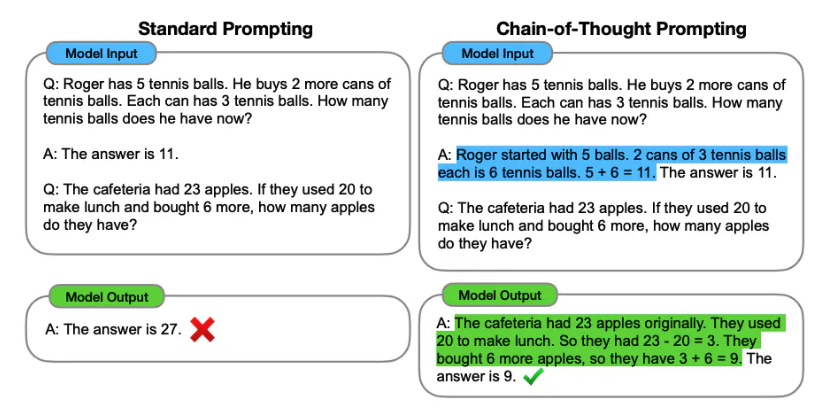

In [1]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [2]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0,
    )
    return response.choices[0].message["content"]


# [1] Normal prompt

제공하고 있는 예시들은 잘못 생성하고 있으나, 현재 기준 (23.12.14) gpt-3.5-turbo는 강건함...

In [3]:
prompt = """
        Q:Roger has 5 tennis balls. He buys 2 more cans of tennis balls.
        Each can has 3 tennis balls. How man tennis balls does he have now?
        A : The answer is 11.
        Q : The cafeteria had 23 apples. 
        if they used 20 to make lunch and bought 6 more, how man apples do they have?
"""

print(get_completion(prompt))

A: The cafeteria now has 9 apples.


# [2] COT prompt


In [4]:
prompt = """
        Q : Roger has 5 tennis balls. He buys 2 more cnas of tennis balls.
        Each can has 3 tennis balls.
        How many tennis balls does he have now?
        
        A : Roger started with 5 balls. 2 cans of 3 tennis balls each is 6 tennis balls.
        5+6 = 11. The answr is 11.
        
        Q : The cafeteria had 23 apples. If they used 20 to make lunch and bought 6 more,
        how many apples do they have?
        
"""

print(get_completion(prompt))

A : The cafeteria started with 23 apples. They used 20 for lunch, so they have 23-20 = 3 apples left.
Then they bought 6 more apples, so they have 3+6 = 9 apples now. The answer is 9.


# [3]

In [5]:
prompt = """
    The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
    A: Adding all the odd numbers (9, 15, 1) gives 25. The answer is False.
    The odd numbers in this group add up to an even number: 17,  10, 19, 4, 8, 12, 24.
    A: Adding all the odd numbers (17, 19) gives 36. The answer is True.
    The odd numbers in this group add up to an even number: 16,  11, 14, 4, 8, 13, 24.
    A: Adding all the odd numbers (11, 13) gives 24. The answer is True.
    The odd numbers in this group add up to an even number: 17,  9, 10, 12, 13, 4, 2.
    A: Adding all the odd numbers (17, 9, 13) gives 39. The answer is False.
    The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
A:
"""

print(get_completion(prompt))

Adding all the odd numbers (15, 5, 13, 7, 1) gives 41. The answer is False.


# [4]

In [6]:
prompt= """
    The odd numbers in this group add up to an even number: 4, 8, 9, 15, 12, 2, 1.
    A: Adding all the odd numbers (9, 15, 1) gives 25. The answer is False.
    The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
    A:
"""

print(get_completion(prompt))

Adding all the odd numbers (15, 5, 13, 7, 1) gives 41. The answer is False.


# Zero-Shot COT prompting

    최근에 나온 Kojima et al. (2022)의 아이디어는 Zero-shot CoT로, 기본적으로 원래 프롬프트에 "단계별로 생각하자"를 추가하는 것을 포함합니다. 
    가이드에 나와있는 내용과 현재의 아웃풋이 조금 다름

# [5]

In [7]:
prompt = """
    I went to the market and bought 10 apples.
    I gave 2 apples to the neighbor and 2 to the repairman.
    I then went and bought 5 more apples and ate 1. 
    How many apples did I remain with?
"""

print(get_completion(prompt))

You started with 10 apples. 
You gave 2 apples to the neighbor, so you have 10 - 2 = 8 apples remaining.
You also gave 2 apples to the repairman, so you have 8 - 2 = 6 apples remaining.
You then bought 5 more apples, so you have 6 + 5 = 11 apples.
Lastly, you ate 1 apple, so you have 11 - 1 = 10 apples remaining.


# [6]


In [9]:
prompt = """
    I went to the market and bought 10 apples.
    I gave 2 apples to the neighbor and 2 to the repairman.
    I then went and bought 5 more apples and ate 1. 
    How many apples did I remain with?
    Let's think step by step.
"""

print(get_completion(prompt))


Step 1: I bought 10 apples.
Step 2: I gave 2 apples to the neighbor, so I have 10 - 2 = 8 apples remaining.
Step 3: I gave 2 more apples to the repairman, so I have 8 - 2 = 6 apples remaining.
Step 4: I bought 5 more apples, so I have 6 + 5 = 11 apples.
Step 5: I ate 1 apple, so I have 11 - 1 = 10 apples remaining.

Therefore, I remained with 10 apples.


# Automatic Chain-of-Thought (Auto-CoT)


github : https://github.com/amazon-science/auto-cot


    CoT prompting은 다양한 예를 수작업으로 만드는 것이 필요합니다.

    이러한 수작업에 대해서 Zhang et al. (2022)은 "단계별로 생각하자"는 프롬프트가 있는 LLM을 활용하여 시연을 위한 CoT를 하나씩 생성함으로써 수동적인 노력을 제거하는 접근법입니다.
    자동으로 생성되는 프로세스에서 체인 생성 시 잘못 만들어질 수 있기 때문에, 이러한 영향을 완화하기 위해 시연의 다양성이 중요합니다. 이 작업은 다양성이 있는 질문을 샘플링하고 시연을 구성하기 위해 추론 체인을 생성하는 Auto-CoT를 제안합니다.
    Auto-CoT는 크게 두 단계로 구성됩니다:
    1단계) question clustering(질문 클러스터링): 주어진 데이터셋의 질문을 몇 개의 클러스터로 분할
    2단계) demonstration sampling(시연 샘플링): 각 클러스터에서 대표적인 질문을 선택하고 간단한 휴리스틱이 있는 Zero-Shot-CoT를 사용하여 추론 체인을 생성
    간단한 휴리스틱은 질문의 길이(예: 60개 토큰)와 이론적 근거의 단계 수(예: 5개 추론 단계)일 수 있습니다. 이는 모델이 간단하고 정확한 시연을 사용하도록 장려합니다.

# [7]

In [10]:
prompt = """
        Q : While shopping for music online, Zoe bought 3 country albums and 5 pop albums.
        Each album came with a lyric sheet and had 3 songs.
        How many songs did Zoe buy total?
        A : Zeo bought 3 country albums. Each album has 3 songs.
        So she bought 3*3=9 songs from the country albums.
        Zeo bought 5 pop albums. Each album has 3 songs.
        So she bought 5*3=15 songs form the pop albums.
        Zoe bought 9+15=24 songs in total.
        The answer is 24.
        
        Q : A chef need to cook 9 potatos. He has already cooked 7.
        if each potato takes 3 minutes to cook, how long will it take him to cook the res?
        A: The chef has already cooked 7 potatoes. That means it has taken him 7*3 minutes to cook those 7 potatoes.
        That means it wll take him 3 more minutes to cook each of the remaining 2 potatoes.
        
        Q:A pet store had 64 puppies. In one day they sold 28 of them and put the ret into cages with 4 in each cages.
        How many caeges did they use?


"""

print(get_completion(prompt))

A: The pet store sold 28 puppies, so they have 64 - 28 = 36 puppies left.
They put 4 puppies in each cage, so they will need 36 / 4 = 9 cages. 
Therefore, they used 9 cages.


# [8] 

In [12]:
prompt = """
        Q : While shopping for music online, Zoe bought 3 country albums and 5 pop albums.
        Each album came with a lyric sheet and had 3 songs.
        How many songs did Zoe buy total?
        A : Zeo bought 3 country albums. Each album has 3 songs.
        So she bought 3*3=9 songs from the country albums.
        Zeo bought 5 pop albums. Each album has 3 songs.
        So she bought 5*3=15 songs form the pop albums.
        Zoe bought 9+15=24 songs in total.
        The answer is 24.
        
        Q : A chef need to cook 9 potatos. He has already cooked 7.
        if each potato takes 3 minutes to cook, how long will it take him to cook the res?
        A: The chef has already cooked 7 potatoes. That means it has taken him 7*3 minutes to cook those 7 potatoes.
        That means it wll take him 3 more minutes to cook each of the remaining 2 potatoes.
        
        Q:A pet store had 64 puppies. In one day they sold 28 of them and put the ret into cages with 4 in each cages.
        How many caeges did they use?
        A : Let's think step by step.


"""

print(get_completion(prompt))

First, we need to find out how many puppies are left after selling 28 of them. 
64 - 28 = 36 puppies are left.

Next, we need to find out how many cages are needed to put the remaining puppies. 
Since each cage can hold 4 puppies, we divide the number of puppies by 4. 
36 / 4 = 9 cages are needed.

Therefore, the pet store used 9 cages to hold the remaining puppies.


# [9]

In [11]:
prompt = """
        Q : While shopping for music online, Zoe bought 3 country albums and 5 pop albums.
        Each album came with a lyric sheet and had 3 songs.
        How many songs did Zoe buy total?
        A : Let's think step by step. Zeo bought 3 country albums. Each album has 3 songs.
        So she bought 3*3=9 songs from the country albums.
        Zeo bought 5 pop albums. Each album has 3 songs.
        So she bought 5*3=15 songs form the pop albums.
        Zoe bought 9+15=24 songs in total.
        The answer is 24.
        
        Q : A chef need to cook 9 potatos. He has already cooked 7.
        if each potato takes 3 minutes to cook, how long will it take him to cook the res?
        A: Let's think step by step. The chef has already cooked 7 potatoes. That means it has taken him 7*3 minutes to cook those 7 potatoes.
        That means it wll take him 3 more minutes to cook each of the remaining 2 potatoes.
        
        Q:A pet store had 64 puppies. In one day they sold 28 of them and put the ret into cages with 4 in each cages.
        How many caeges did they use?
        A : Let's think step by step.


"""

print(get_completion(prompt))

The pet store sold 28 puppies, so they have 64 - 28 = 36 puppies left.
They put 4 puppies in each cage, so they will need 36 / 4 = 9 cages.
Therefore, they used 9 cages.
